In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"joaomariajaneiro","key":"5cd03f4f8afc6a93ebda8b93c8daf620"}'}

In [3]:
%ls

kaggle.json  sample_data/


In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! ls ~/.kaggle/

kaggle.json


In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d abhinavwalia95/entity-annotated-corpus

 34% 9.00M/26.4M [00:00<00:00, 55.7MB/s]
100% 26.4M/26.4M [00:00<00:00, 105MB/s] 


In [9]:
!unzip entity-annotated-corpus.zip

Archive:  entity-annotated-corpus.zip
  inflating: ner.csv                 
  inflating: ner_dataset.csv         


In [10]:
%pwd

'/content'

In [11]:
!ls

entity-annotated-corpus.zip  kaggle.json  ner.csv  ner_dataset.csv  sample_data


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("ner_dataset.csv", encoding="latin1")
df = df.drop(['POS'], axis =1)
df = df.fillna(method="ffill")
df.tail(12)

,Sentence #,Word,Tag
1048563,Sentence: 47958,exploded,O
1048564,Sentence: 47958,upon,O
1048565,Sentence: 47958,impact,O
1048566,Sentence: 47958,.,O
1048567,Sentence: 47959,Indian,B-gpe
1048568,Sentence: 47959,forces,O
1048569,Sentence: 47959,said,O
1048570,Sentence: 47959,they,O
1048571,Sentence: 47959,responded,O
1048572,Sentence: 47959,to,O


In [14]:
words = set(list(df['Word'].values))
words.add('PADDING')
n_words = len(words)
n_words

35179

In [15]:
df.head()

,Sentence #,Word,Tag
0,Sentence: 1,Thousands,O
1,Sentence: 1,of,O
2,Sentence: 1,demonstrators,O
3,Sentence: 1,have,O
4,Sentence: 1,marched,O


In [16]:
tags = list(set(df["Tag"].values))
n_tags = len(tags)
n_tags

17

In [17]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(
                                                    s["Word"].values.tolist(),
                                                     s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [18]:
getter = SentenceGetter(df)
sent = getter.get_next()
print(sent)

[('Thousands', 'O'), ('of', 'O'), ('demonstrators', 'O'), ('have', 'O'), ('marched', 'O'), ('through', 'O'), ('London', 'B-geo'), ('to', 'O'), ('protest', 'O'), ('the', 'O'), ('war', 'O'), ('in', 'O'), ('Iraq', 'B-geo'), ('and', 'O'), ('demand', 'O'), ('the', 'O'), ('withdrawal', 'O'), ('of', 'O'), ('British', 'B-gpe'), ('troops', 'O'), ('from', 'O'), ('that', 'O'), ('country', 'O'), ('.', 'O')]


In [19]:
getter.grouped

Sentence #
Sentence: 1        [(Thousands, O), (of, O), (demonstrators, O), ...
Sentence: 10       [(Iranian, B-gpe), (officials, O), (say, O), (...
Sentence: 100      [(Helicopter, O), (gunships, O), (Saturday, B-...
Sentence: 1000     [(They, O), (left, O), (after, O), (a, O), (te...
Sentence: 10000    [(U.N., B-geo), (relief, O), (coordinator, O),...
                                         ...                        
Sentence: 9995     [(Opposition, O), (leader, O), (Mir, O), (Hoss...
Sentence: 9996     [(On, O), (Thursday, B-tim), (,, O), (Iranian,...
Sentence: 9997     [(Following, O), (Iran, B-geo), ('s, O), (disp...
Sentence: 9998     [(Since, O), (then, O), (,, O), (authorities, ...
Sentence: 9999     [(The, O), (United, B-org), (Nations, I-org), ...
Length: 47959, dtype: object

In [20]:
sentences = getter.sentences
print(len(sentences))

47959


In [21]:
largest_sen = max(len(sen) for sen in sentences)
print('biggest sentence has {} words'.format(largest_sen))

biggest sentence has 104 words


In [22]:
# Go through each tripplet of sentence (word, pos, tag) and get all words of a sentece
X = [[w[0]for w in s] for s in sentences]
X[0]

['Thousands',
 'of',
 'demonstrators',
 'have',
 'marched',
 'through',
 'London',
 'to',
 'protest',
 'the',
 'war',
 'in',
 'Iraq',
 'and',
 'demand',
 'the',
 'withdrawal',
 'of',
 'British',
 'troops',
 'from',
 'that',
 'country',
 '.']

In [23]:
# Go through each tripplet of sentence (word, pos, tag) and get all tags of a sentece
labels = [[s[1] for s in sent] for sent in getter.sentences]
print(labels[0])

['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


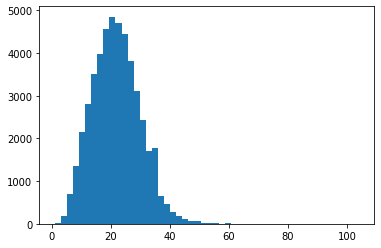

In [24]:
%matplotlib inline
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [25]:
max_len = 60
new_X = []
for seq in X:
    new_seq = []
    for i in range(max_len):
        try:
            new_seq.append(seq[i])
        except:
            new_seq.append("PADDING")
    new_X.append(new_seq)

In [26]:
new_X[2]

['Helicopter',
 'gunships',
 'Saturday',
 'pounded',
 'militant',
 'hideouts',
 'in',
 'the',
 'Orakzai',
 'tribal',
 'region',
 ',',
 'where',
 'many',
 'Taliban',
 'militants',
 'are',
 'believed',
 'to',
 'have',
 'fled',
 'to',
 'avoid',
 'an',
 'earlier',
 'military',
 'offensive',
 'in',
 'nearby',
 'South',
 'Waziristan',
 '.',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING']

In [27]:
from keras.preprocessing.sequence import pad_sequences

tags2index = {t:i for i,t in enumerate(tags)}
y = [[tags2index[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tags2index["O"])

y[2]

array([ 3,  3,  2,  3,  3,  3,  3,  3, 10,  3,  3,  3,  3,  3,  4,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3, 10,  7,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3], dtype=int32)

In [28]:
tags2index

{'B-art': 0,
 'B-eve': 1,
 'B-geo': 10,
 'B-gpe': 16,
 'B-nat': 9,
 'B-org': 4,
 'B-per': 15,
 'B-tim': 2,
 'I-art': 11,
 'I-eve': 8,
 'I-geo': 7,
 'I-gpe': 14,
 'I-nat': 13,
 'I-org': 5,
 'I-per': 12,
 'I-tim': 6,
 'O': 3}

In [29]:
len(tags2index)

17

In [30]:
y[0]

array([ 3,  3,  3,  3,  3,  3, 10,  3,  3,  3,  3,  3, 10,  3,  3,  3,  3,
        3, 16,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3], dtype=int32)

In [31]:
not_padded_X = X
X = new_X

In [32]:
X[0]

['Thousands',
 'of',
 'demonstrators',
 'have',
 'marched',
 'through',
 'London',
 'to',
 'protest',
 'the',
 'war',
 'in',
 'Iraq',
 'and',
 'demand',
 'the',
 'withdrawal',
 'of',
 'British',
 'troops',
 'from',
 'that',
 'country',
 '.',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING']

In [33]:
import tensorflow as tf

# MLP with context + CRF

Input: $x_i = concat([ emb[i-1], \space emb[i], \space emb[i+1] ])$


$y = mlp(x_i)$  //One layer should be enough

In [34]:
word2idx = {w: i for i, w in enumerate(words)}

In [35]:
list(word2idx.keys())[-1]

'Khin'

In [36]:
len(word2idx)

35179

In [37]:
X_indexes = [[word2idx[w] for w in sent] for sent in X]

In [38]:
X[0]

['Thousands',
 'of',
 'demonstrators',
 'have',
 'marched',
 'through',
 'London',
 'to',
 'protest',
 'the',
 'war',
 'in',
 'Iraq',
 'and',
 'demand',
 'the',
 'withdrawal',
 'of',
 'British',
 'troops',
 'from',
 'that',
 'country',
 '.',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING',
 'PADDING']

In [39]:
print(word2idx['Thousands'])
print(word2idx['demonstrators'])
print(word2idx['country'])

21521
13634
18342


In [40]:
X_indexes[0]

[21521,
 21735,
 13634,
 14121,
 2410,
 10363,
 24189,
 24437,
 10553,
 10068,
 18616,
 25101,
 20137,
 19238,
 22976,
 10068,
 16291,
 21735,
 34755,
 5747,
 4320,
 22985,
 18342,
 33941,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318,
 318]

In [41]:
np.array(X_indexes).shape

(47959, 60)

In [42]:
np.array(y).shape

(47959, 60)

In [43]:
concated = []
# concated = np.zeros((47959, 60, 3))

for sentence in X_indexes:
  for word_index in range(len(sentence)):
    if word_index == 0:
      concated.append( [ word2idx['PADDING'], sentence[word_index], sentence[word_index + 1] ] )
    elif word_index == len(sentence) - 1:
      concated.append( [ sentence[word_index - 1], sentence[word_index], word2idx['PADDING'] ] )
    else:
      concated.append( [ sentence[word_index - 1], sentence[word_index], sentence[word_index + 1] ] )

concated = np.array(concated)
concated.shape

(2877540, 3)

In [44]:
# We will give each word the previous and next word as context
concated = concated.reshape((len(X_indexes), max_len, 3))

In [45]:
concated.shape

(47959, 60, 3)

In [46]:
concated[0]

array([[  318, 21521, 21735],
       [21521, 21735, 13634],
       [21735, 13634, 14121],
       [13634, 14121,  2410],
       [14121,  2410, 10363],
       [ 2410, 10363, 24189],
       [10363, 24189, 24437],
       [24189, 24437, 10553],
       [24437, 10553, 10068],
       [10553, 10068, 18616],
       [10068, 18616, 25101],
       [18616, 25101, 20137],
       [25101, 20137, 19238],
       [20137, 19238, 22976],
       [19238, 22976, 10068],
       [22976, 10068, 16291],
       [10068, 16291, 21735],
       [16291, 21735, 34755],
       [21735, 34755,  5747],
       [34755,  5747,  4320],
       [ 5747,  4320, 22985],
       [ 4320, 22985, 18342],
       [22985, 18342, 33941],
       [18342, 33941,   318],
       [33941,   318,   318],
       [  318,   318,   318],
       [  318,   318,   318],
       [  318,   318,   318],
       [  318,   318,   318],
       [  318,   318,   318],
       [  318,   318,   318],
       [  318,   318,   318],
       [  318,   318,   318],
       [  

In [47]:
concated_reshape_test = concated.reshape((len(X_indexes), max_len * 3))

In [48]:
concated_reshape_test.shape

(47959, 180)

In [49]:
concated_reshape_test[0]

array([  318, 21521, 21735, 21521, 21735, 13634, 21735, 13634, 14121,
       13634, 14121,  2410, 14121,  2410, 10363,  2410, 10363, 24189,
       10363, 24189, 24437, 24189, 24437, 10553, 24437, 10553, 10068,
       10553, 10068, 18616, 10068, 18616, 25101, 18616, 25101, 20137,
       25101, 20137, 19238, 20137, 19238, 22976, 19238, 22976, 10068,
       22976, 10068, 16291, 10068, 16291, 21735, 16291, 21735, 34755,
       21735, 34755,  5747, 34755,  5747,  4320,  5747,  4320, 22985,
        4320, 22985, 18342, 22985, 18342, 33941, 18342, 33941,   318,
       33941,   318,   318,   318,   318,   318,   318,   318,   318,
         318,   318,   318,   318,   318,   318,   318,   318,   318,
         318,   318,   318,   318,   318,   318,   318,   318,   318,
         318,   318,   318,   318,   318,   318,   318,   318,   318,
         318,   318,   318,   318,   318,   318,   318,   318,   318,
         318,   318,   318,   318,   318,   318,   318,   318,   318,
         318,   318,

## Experiments with shapes

In [50]:
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

emb_dim = 64

concated_emb_test = Embedding(input_dim=len(word2idx), output_dim=emb_dim, input_length=max_len)(concated_reshape_test)

In [51]:
concated_emb_test.shape

TensorShape([47959, 180, 64])

In [52]:
concated_emb_test[0]

<tf.Tensor: shape=(180, 64), dtype=float32, numpy=
array([[ 0.03534457,  0.04451981, -0.00902393, ..., -0.00227603,
         0.02646231,  0.02061299],
       [ 0.01509348, -0.04837545, -0.03363393, ...,  0.02352906,
         0.01260654,  0.01038439],
       [ 0.01010979,  0.03235884, -0.03742785, ..., -0.01771088,
        -0.01100957, -0.02162526],
       ...,
       [ 0.03534457,  0.04451981, -0.00902393, ..., -0.00227603,
         0.02646231,  0.02061299],
       [ 0.03534457,  0.04451981, -0.00902393, ..., -0.00227603,
         0.02646231,  0.02061299],
       [ 0.03534457,  0.04451981, -0.00902393, ..., -0.00227603,
         0.02646231,  0.02061299]], dtype=float32)>

In [53]:
print(concated_emb_test[0][3])
print(concated_emb_test[0][4])
print(concated_emb_test[0][5])

tf.Tensor(
[ 0.01509348 -0.04837545 -0.03363393  0.03922651  0.04795407 -0.03277256
  0.03938459  0.02254761 -0.01862304 -0.01716008  0.04875249 -0.0469525
  0.00287377  0.02798684  0.03611371 -0.00152778  0.04332879  0.03708548
 -0.02875759 -0.02810429 -0.02524658  0.03233669  0.01830686 -0.02144229
  0.04448453 -0.00278223  0.04369456  0.03080043 -0.03113917 -0.03345579
  0.01526972  0.00580741 -0.00408436  0.04736665 -0.02306995  0.03098805
 -0.0429945   0.0438031  -0.02586397  0.03181026  0.0435803  -0.02651472
  0.02984457 -0.00421154  0.03078366 -0.03123108  0.0227392  -0.02876751
  0.02416233  0.01003271  0.04890687  0.01228357 -0.04685714 -0.01878129
 -0.02203161  0.01107221 -0.02906637  0.02296456 -0.02041736 -0.04699131
  0.03419602  0.02352906  0.01260654  0.01038439], shape=(64,), dtype=float32)
tf.Tensor(
[ 0.01010979  0.03235884 -0.03742785 -0.01370915 -0.04230708  0.02587647
  0.04675475 -0.00479922 -0.03624653 -0.03493752  0.04028245 -0.01033189
  0.04425487  0.03594773

In [54]:
np.array(concated_emb_test).reshape((len(X_indexes), max_len, 64 * 3))[0][1]

array([ 1.50934793e-02, -4.83754538e-02, -3.36339250e-02,  3.92265059e-02,
        4.79540713e-02, -3.27725559e-02,  3.93845923e-02,  2.25476138e-02,
       -1.86230429e-02, -1.71600804e-02,  4.87524904e-02, -4.69524972e-02,
        2.87376717e-03,  2.79868357e-02,  3.61137055e-02, -1.52777508e-03,
        4.33287881e-02,  3.70854847e-02, -2.87575852e-02, -2.81042941e-02,
       -2.52465848e-02,  3.23366858e-02,  1.83068551e-02, -2.14422941e-02,
        4.44845296e-02, -2.78222561e-03,  4.36945595e-02,  3.08004282e-02,
       -3.11391708e-02, -3.34557891e-02,  1.52697228e-02,  5.80741093e-03,
       -4.08435985e-03,  4.73666526e-02, -2.30699535e-02,  3.09880488e-02,
       -4.29944992e-02,  4.38030995e-02, -2.58639697e-02,  3.18102576e-02,
        4.35802974e-02, -2.65147220e-02,  2.98445709e-02, -4.21154499e-03,
        3.07836644e-02, -3.12310811e-02,  2.27391981e-02, -2.87675150e-02,
        2.41623260e-02,  1.00327134e-02,  4.89068739e-02,  1.22835748e-02,
       -4.68571447e-02, -

In [55]:
test_end_shape = np.array(concated_emb_test).reshape((len(X_indexes), max_len, 64 * 3))

In [56]:
test_end_shape.shape

(47959, 60, 192)

In [57]:
y.shape

(47959, 60)

## Train/Test Split

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(concated_reshape_test, y, test_size=0.2)

In [59]:
X_train.shape

(38367, 180)

In [60]:
y_train.shape

(38367, 60)

In [61]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.01)

In [62]:
X_val.shape

(384, 180)

In [63]:
emb_dim = 64

In [64]:
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Reshape
from keras.models import Model, Input


input = Input(shape=3*max_len)
X = Embedding(input_dim=len(word2idx), output_dim=emb_dim, input_length=max_len)(input)
X = Reshape( (max_len, 3*emb_dim) )(X)

out = tf.keras.layers.Dense(n_tags, activation="softmax")(X)

model = Model(input, out)

In [65]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [66]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=100, epochs=5)

Epoch 1/5
380/380 [==============================] - 14s 36ms/step - loss: 1.2789 - accuracy: 0.8672 - val_loss: 0.1293 - val_accuracy: 0.9697
Epoch 2/5
380/380 [==============================] - 13s 34ms/step - loss: 0.1003 - accuracy: 0.9768 - val_loss: 0.0698 - val_accuracy: 0.9833
Epoch 3/5
380/380 [==============================] - 13s 34ms/step - loss: 0.0560 - accuracy: 0.9859 - val_loss: 0.0560 - val_accuracy: 0.9861
Epoch 4/5
380/380 [==============================] - 13s 34ms/step - loss: 0.0421 - accuracy: 0.9887 - val_loss: 0.0509 - val_accuracy: 0.9863
Epoch 5/5
380/380 [==============================] - 13s 34ms/step - loss: 0.0349 - accuracy: 0.9902 - val_loss: 0.0487 - val_accuracy: 0.9867


In [69]:
model.evaluate(X_train, y_train)

1187/1187 [==============================] - 4s 3ms/step - loss: 0.0309 - accuracy: 0.9912


[0.030862266197800636, 0.9911868572235107]

In [67]:
model.evaluate(X_test, y_test)

300/300 [==============================] - 1s 3ms/step - loss: 0.0410 - accuracy: 0.9878


[0.041001785546541214, 0.9878214597702026]

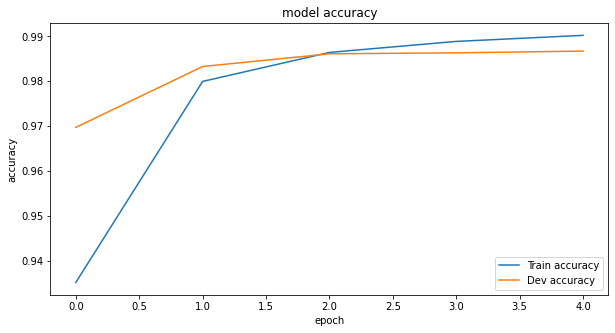

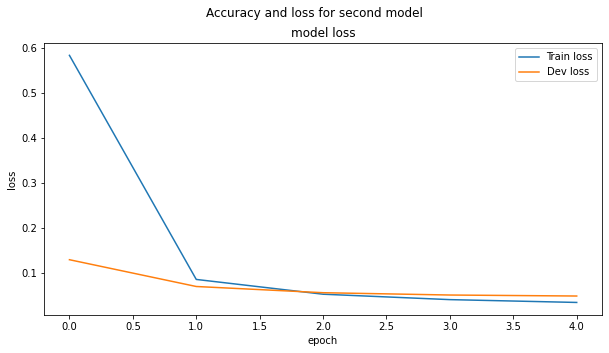

In [68]:
#History for accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train accuracy', 'Dev accuracy'], loc='lower right')
plt.show()
# History for loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Dev loss'], loc='upper right')
plt.suptitle('Accuracy and loss for second model')
plt.show()

# LSTM + CRF

Input: $x_i = emb[i] $

$ z_i = LSTM(x_i) $

$ y = CRF(z_i) $


# BERT + CRF